# Monterey Weather: Exploratory Data Visualization

In [225]:
from datetime import date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
# pandas settings
pd.options.mode.chained_assignment = None  # turn off false positive warnings for editing a copy

In [227]:
df = pd.read_csv('cleaned_df.csv', parse_dates=['datetime'], index_col=['datetime'])
df.head()

,DATE,HourlyPresentWeatherType,HourlySkyConditions,HourlyVisibility,HourlyDryBulbTemperature,HourlyWindSpeed,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindSpeed,DailyPrecipitation,HourlyRelativeHumidity,averageObscuration
datetime,,,,,,,,,,,,
2009-04-01 00:08:00,2009-04-01T00:08:00,NaN,"[{'BKN': SkyCondition(obscuration=7, vertical_...",10.0,52.0,8.0,59.0,49.0,26.0,0.0,77.0,7.0
2009-04-01 00:50:00,2009-04-01T00:50:00,NaN,"[{'SCT': SkyCondition(obscuration=4, vertical_...",9.0,52.0,10.0,59.0,49.0,26.0,0.0,77.0,4.0
2009-04-01 00:54:00,2009-04-01T00:54:00,NaN,"[{'SCT': SkyCondition(obscuration=4, vertical_...",9.0,50.0,9.0,59.0,49.0,26.0,0.0,80.0,4.0
2009-04-01 01:54:00,2009-04-01T01:54:00,NaN,[],9.0,51.0,10.0,59.0,49.0,26.0,0.0,77.0,NaN
2009-04-01 02:54:00,2009-04-01T02:54:00,NaN,[],9.0,50.0,16.0,59.0,49.0,26.0,0.0,80.0,NaN


# Introduction

Chaos determines weather, and [the most powerful weather prediction systems](https://xkcd.com/1885/) depend on models of chaos. With this in mind, when asked to make a prediction for hypothetical event planners based on a decade of hourly weather data using a laptop, it's useful to frame the task of exploratory visualization with the question: from what perspectives is this data least chaotic?

Event planners are often most concerned with the presence or absence of sun, which appears  in the dataset as the average sky obscuration value. So a good first question might be, 

*1. Averaged across the whole decade, which hours of the day tend to be more or less sunny (obscured)?*

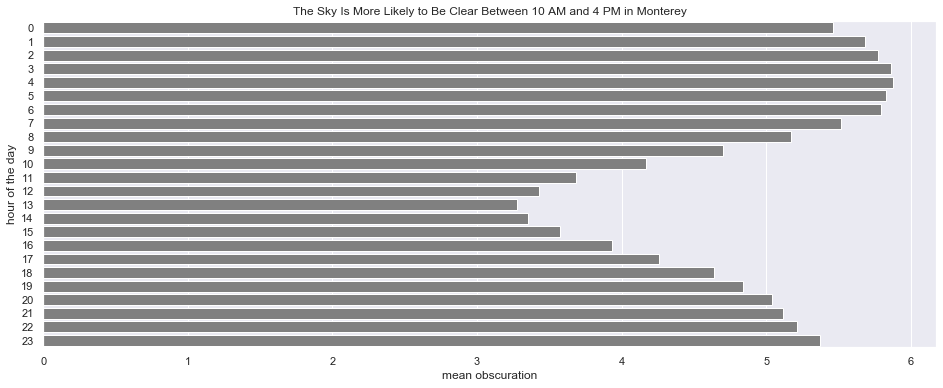

In [228]:
sns.set()

hourly_obscuration = pd.DataFrame(df.groupby(df.index.hour).averageObscuration.mean())
hourly_obscuration = hourly_obscuration.reset_index()
hourly_obscuration.columns = ['hour of the day', 'mean obscuration']
plt.figure(figsize=(16, 6))
sns.barplot(y='hour of the day', x='mean obscuration', color='grey', orient='h', data=hourly_obscuration).set_title('The Sky Is More Likely to Be Clear Between 10 AM and 4 PM in Monterey')
plt.show()

It looks like the hours between 10 AM and 4 PM are the least obscured. But this is averaging out any changes over the course of the usual year. How might the result take into account this sort of variation?:

*2. Averaged across the decade, for each hour, what's the typical range obscuration values in a given month?*

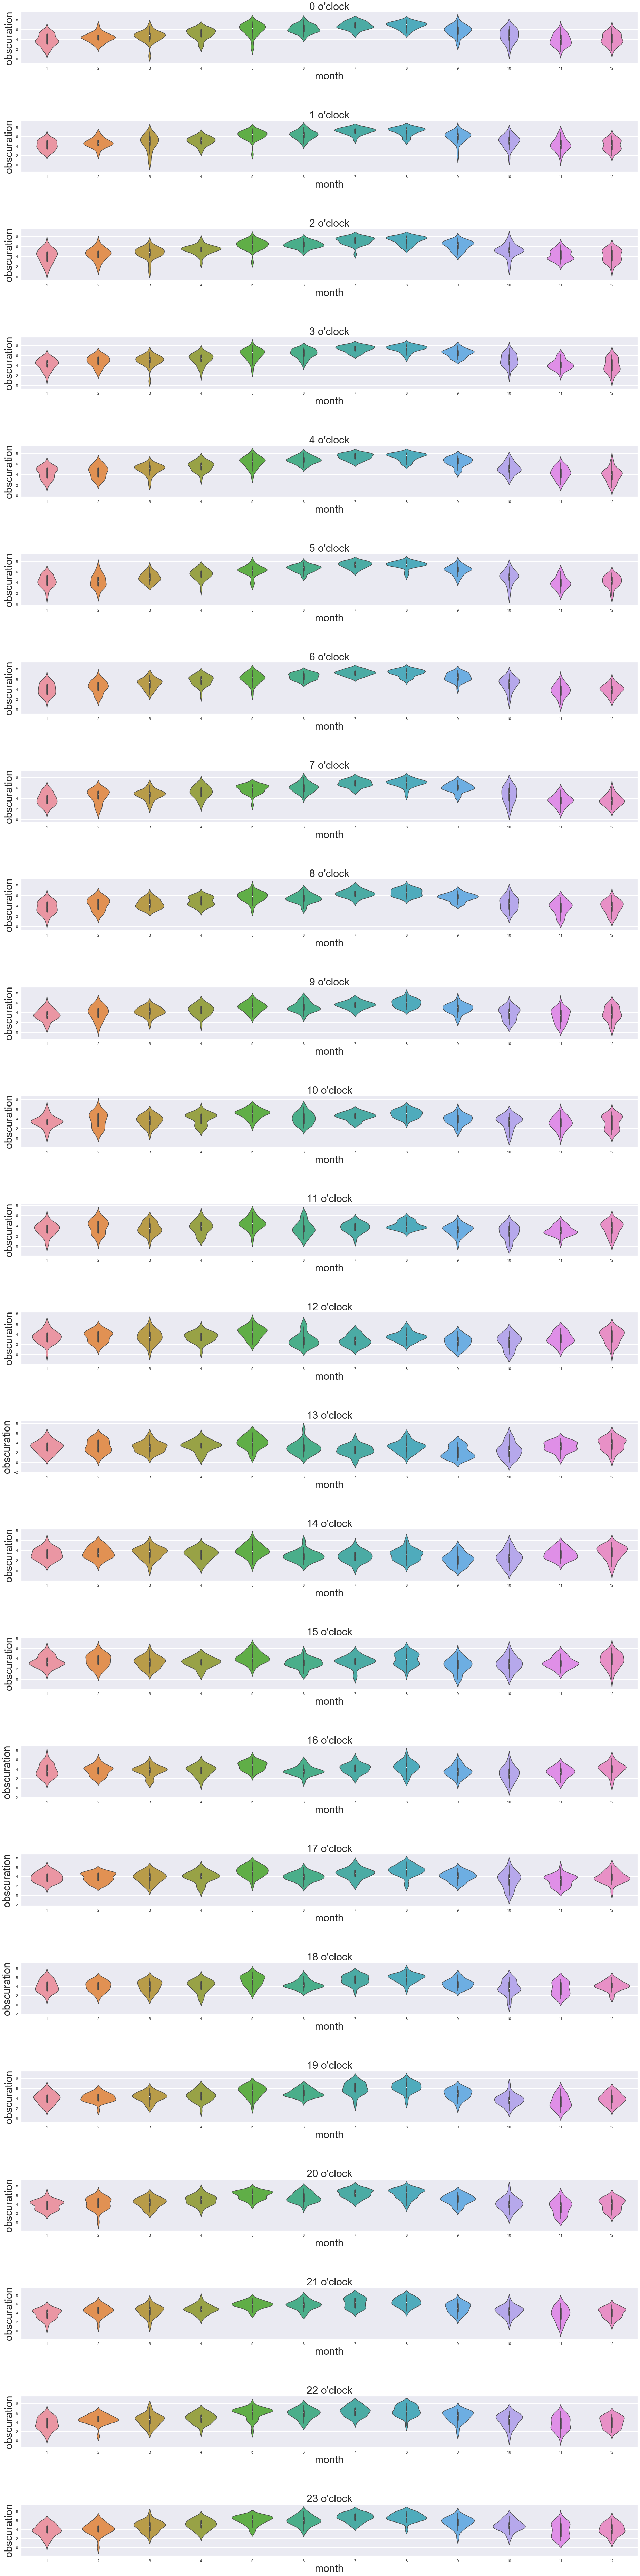

In [229]:

f, axes = plt.subplots(24,1)
f.set_size_inches(32,128)
axes = axes.flatten()

def add_subplot(master_frame, index):
    hour_frame = hours.loc[index]
    hour_frame = hour_frame.reset_index()
    v = sns.violinplot(y='averageObscuration', x='month', data=hour_frame, ax=axes[index])
    v.set_xlabel("month", fontsize=30)
    v.set_ylabel("obscuration", fontsize=30)
    title_string = str(index) + " o'clock"
    v.set_title(title_string, fontsize=30)

hours = df
hours = pd.DataFrame(df.groupby([df.index.hour, df.index.day, df.index.month]).averageObscuration.mean())
hours.index = hours.index.set_names(['hour', 'day', 'month'])
for x in range(24):
    add_subplot(hours, x)
    

    
left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  1.1    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)
plt.savefig('figures/hourlyAverageObscurationOverYear.png')
plt.show()

These plots reveal a couple important features of the area's climate. The nighttime and early morning hours become reliably very foggy in the "summer" months, which is the sort of relatively automatic watering that allowed crops like berries to thrive in this area in the early twentieth century. In contrast, late morning to early afternoon hours remain much more varied throughout the year. 1 PM and 2 PM in September and October show the best (most bottom-heavy) visibility distributions.

Before looking into obscuration by day more speciifcally, it's useful to have a look first at the distribution of daily average obscuration values across the ten years of hourly data. (That is, 365 * 10 daily average obscuration values):

*3. Given the obscuration values in the data set from 0 to 9, where 0-2 is clear, 2-4 is scattered clouds, and 4-6 is overcast, and 6-9 is fully obscured, how many days in the last ten years fall into each category?*

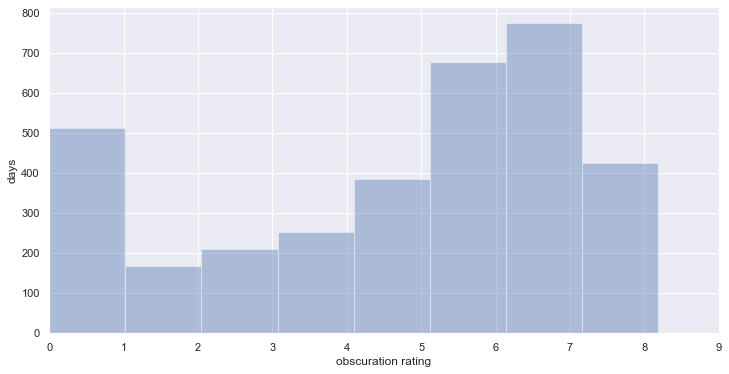

In [230]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')

obscuration = pd.DataFrame(df['averageObscuration'].groupby([df.index.date]).mean().dropna()) # ten years of individual dates
obscuration.name = 'There are more cloudy days than sunny days in the last decade.'

plt.xlim(0, 9)
sns.distplot(obscuration,bins=8, kde=False, norm_hist=False)

plt.xlabel('obscuration rating')
plt.ylabel('days')
plt.show()

This eight-bin histogram illustrates the national weather service's mapping between sky condition categories and obscuration values on a scale from 0 to 9: 0-2 would get the code corresponding to "clear," 2-4 "scattered clouds," 4-6 "overcast," and 6-9 "fully obscured." (A rating of 9 is rarely used.) This shows us that weather in the area skews a bit toward cloudiness. The recommendation task here takes a binary view of this histogram: we're mainly interested in the days with an obscuration of less than or equal to around 4, the threshold for "overcast."

But this distribution takes each date in the last decade as a single datapoint. This view looks a bit different if we average each calendar day across the ten years of data to get 365 data points instead of 3,645:

*4. Averaging each annual calendar day across the decade, what's the year's distribution of obscuration values?*

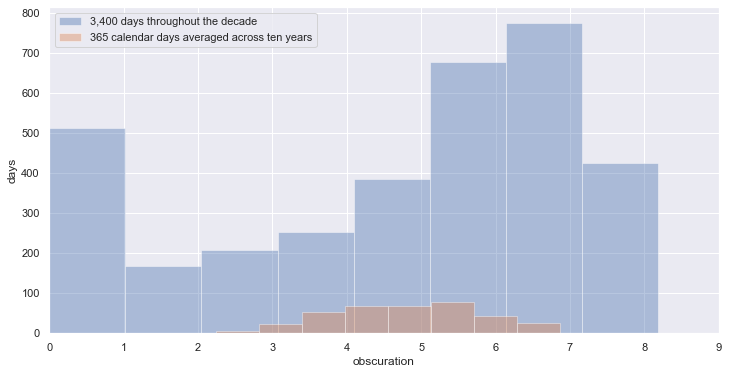

In [231]:
plt.figure(figsize=(12, 6))

obscuration = pd.DataFrame(df['averageObscuration'].groupby([df.index.date]).mean().dropna()) # ten years of individual dates
obscuration.name = 'There are more cloudy days than sunny days in the last decade.'
sns.distplot(obscuration,bins=8, kde=False, label='3,400 days throughout the decade')

obscuration_year_averaged_across_decade = pd.DataFrame(df['averageObscuration'].groupby([df.index.month, df.index.day]).mean())
obscuration_year_averaged_across_decade.name = 'Averaging Obscuration Across the Ten Years Compresses the Distribution'
sns.distplot(obscuration_year_averaged_across_decade,bins=8, kde=False, label='365 calendar days averaged across ten years')


# plt.ylim(0, 500)
plt.xlim(0, 9)
plt.legend()
plt.xlabel('obscuration')
plt.ylabel('days')
plt.show()
# plt.savefig('figures/dailyMeanForDatesAcrossDecade.png') # uncomment to write out figure

Let's have a closer look at the distribution of obscuration values for 365 calendar days each averaged over 10 yearly values:

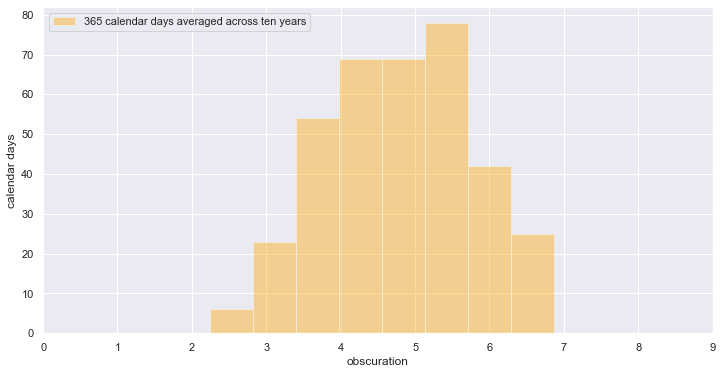

In [232]:
plt.figure(figsize=(12, 6))
obscuration_year_averaged_across_decade = pd.DataFrame(df['averageObscuration'].groupby([df.index.month, df.index.day]).mean())
obscuration_year_averaged_across_decade.name = 'Averaging Obscuration Across the Ten Years Compresses the Distribution'
sns.distplot(obscuration_year_averaged_across_decade,bins=8, color='orange', kde=False, label='365 calendar days averaged across ten years')


# plt.ylim(0, 500)
plt.xlim(0, 9)
plt.legend()
plt.xlabel('obscuration')
plt.ylabel('calendar days')
plt.show()
# plt.savefig('figures/dailyMeanForDatesAcrossDecade.png') # uncomment to write out figure

Averaging each day across its ten yearly values gives a distribution that looks more like a normal distribution, as the clearest and least clear outlier dates are averaged toward less extreme values. It looks like around 75 calendar days have an average obscuration rating below 4, a conservative threshold for a clear sky. 

After getting a sense of how daily obscuration distributes, we can focus in on the clear days. 

*5. Averaged over the decade, how many calendar days have been clear or nearly clear between 10 AM and 4 PM over the last decade (defined here as a "clearish day")?*

In [233]:
by_date = df[(df.index.hour >= 10) & (df.index.hour <= 16)] # get 10 AM to 4 PM
by_date = df.groupby([df.index.month, df.index.day]).averageObscuration.mean() # average by calendar day across decade
by_date = by_date.sort_values()
by_date = by_date[by_date <= 3.5] # 3.5 is a conservative cut-off for a clear day: there are at worst "scattered clouds"
print(str(len(by_date)) + " days have had a decade average obscuration rating of under 3.5.")

36 days have had a decade average obscuration rating of under 3.5.


A cut-off of 3.0 cut this number down from 36 days to 12 days, which means that scattered cloud days are especially important to this analysis. 

*6. Which months are these days in?*

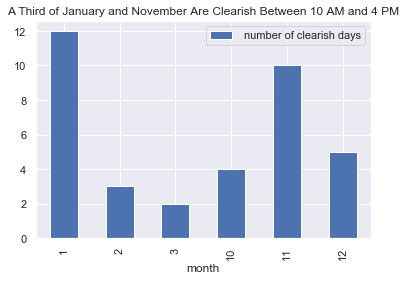

In [234]:
by_date = df[(df.index.hour >= 10) & (df.index.hour <= 16)] # get 10 AM to 4 PM
by_date = df.groupby([df.index.month, df.index.day]).averageObscuration.mean()
by_date = by_date.sort_values()
by_date = by_date[by_date <= 3.5] # 3.5 is a conservative cut-off for a clear day: there are at worst "scattered clouds"
by_date = pd.DataFrame(by_date)
by_date.index = by_date.index.rename(["month", "day"])
# by_date = by_date.unstack(level=0)
by_date
by_date.groupby('month').count().rename(columns={'averageObscuration':' number of clearish days'}).plot(kind='bar', title='A Third of January and November Are Clearish Between 10 AM and 4 PM')
plt.show()



Public consensus  in the area is that September and October have the nicest days, but the data reveal that this understanding might be conflating temperature with sky clarity: November and January have the most reliably clearish days. Next, it might be useful to map out all 36 of these days with their obscurations.

*7. Which days of the year are the 36 days, and what is each day's daily average obscuration?*

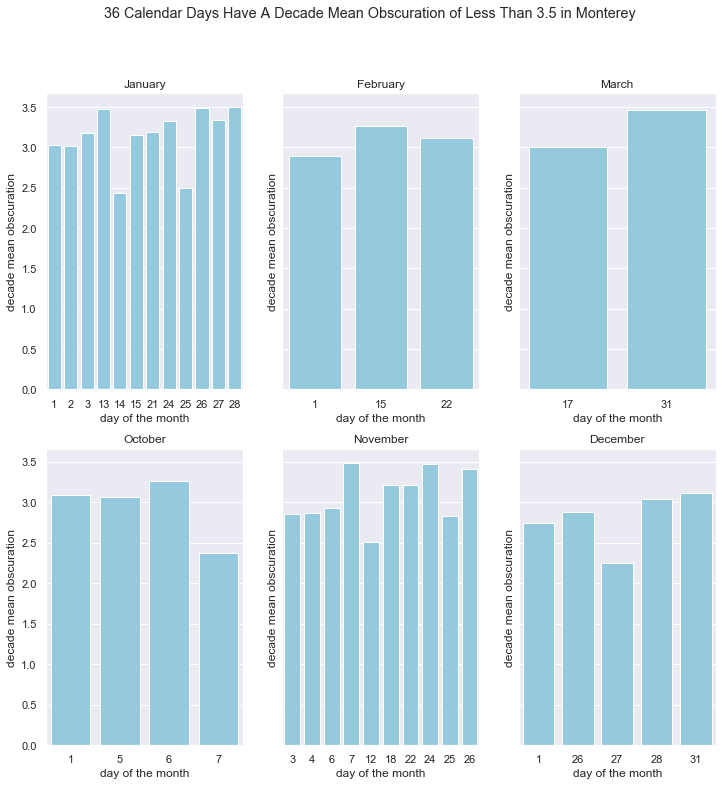

In [235]:
by_date = df[(df.index.hour >= 10) & (df.index.hour <= 16)] # get 10 AM to 4 PM
by_date = df.groupby([df.index.month, df.index.day]).averageObscuration.mean()
by_date = by_date.sort_values()
by_date = by_date[by_date <= 3.5] # 3.5 is a conservative cut-off for a clear day: there are at worst "scattered clouds"
by_date = pd.DataFrame(by_date)
by_date.index = by_date.index.rename(["month", "day"])

# set up subplots
f, axes = plt.subplots(2,3, sharey='row')
f.set_size_inches(12,12)
axes = axes.flatten()

# set up title lookup
month_dict = {1: 'January', 2: 'February', 3: 'March', 10: 'October', 11: 'November', 12: 'December'}

# plot a month
def plot_month(frame, month_index, plot_index):
    """Plots the decade mean obscuration for the index month's clearish days"""
    frame = frame.reset_index()
    frame = frame[frame['month'] == month_index]
    frame = frame.set_index('day')
    frame = frame.sort_index()
    b = sns.barplot(data=frame, x=frame.index, color='skyblue', y='averageObscuration', ax=axes[plot_index])
    b.set_xlabel('day of the month')
    b.set_ylabel('decade mean obscuration')
    b.set_title(month_dict[month_index])

for plot, month in enumerate(set(by_date.index.get_level_values(0))):
    plot_month(by_date, month, plot)

plt.suptitle("36 Calendar Days Have A Decade Mean Obscuration of Less Than 3.5 in Monterey")
plt.savefig('figures/clearishDaysByMonth.png')
plt.show()

This suggests a correlation between temperature and obscuration, as there are so many clear days in winter months. Let's investigate that by plotting temperature range against obscuration. But first, let's have a look at temperature itself.

*8. How does temperature behave over a typical year?*

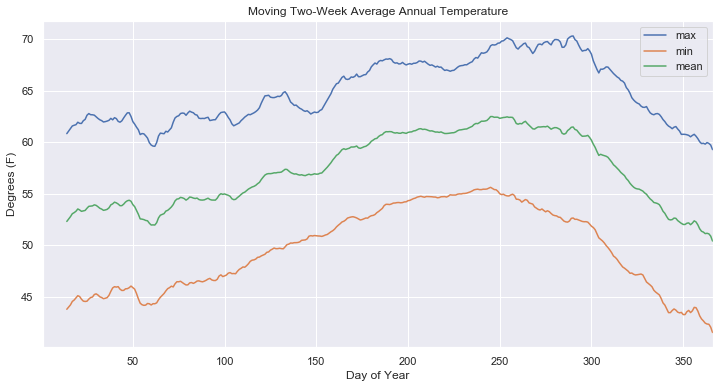

In [236]:
plt.figure(figsize=(12, 6))

x = df
max_temp = x.groupby(df.index.dayofyear)['DailyMaximumDryBulbTemperature'].mean().rolling(14).mean().plot(label='max')
min_temp = x.groupby(df.index.dayofyear)['DailyMinimumDryBulbTemperature'].mean().rolling(14).mean().plot(label='min')

x['mean_temp'] = (df['DailyMaximumDryBulbTemperature'] + df['DailyMinimumDryBulbTemperature'])/2
mean_temp = x.groupby(df.index.dayofyear)['mean_temp'].mean().rolling(14).mean().plot(label='mean')

# plot
plt.legend()
plt.title('Moving Two-Week Average Annual Temperature')
plt.xlabel('Day of Year')
plt.ylabel('Degrees (F)')
plt.show()

This plot of maximum daily temperature shows that days in the middle of the year have much less choatic variation than the rest of the year. Some boxplots per month should confirm this from the month-to-month view of the year.

Do the last ten years share consistent seasonal patterns?:

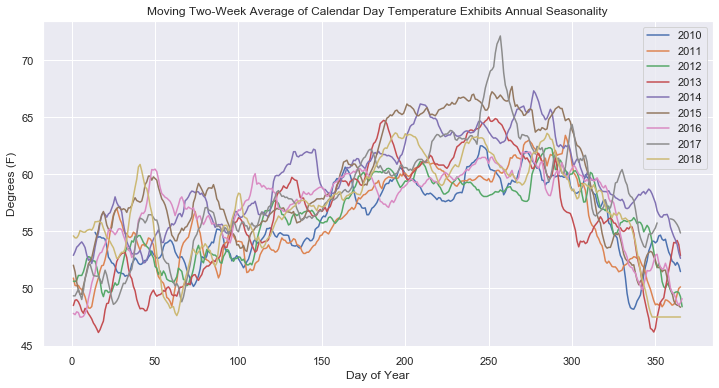

In [237]:
plt.figure(figsize=(12, 6))

x = df
bool_index = (x.index.year >= 2010) & (x.index.year <= 2018)
x = x[bool_index]
x['mean_temp'] = (x['DailyMaximumDryBulbTemperature'] + x['DailyMinimumDryBulbTemperature'])/2

mean_temp = x.groupby([x.index.year, x.index.dayofyear])['mean_temp'].mean().rolling(14).mean()

mean_temp = mean_temp.unstack(level=0)

# plot
for col in mean_temp.columns:
    plt.plot(mean_temp[col], label=str(col))
plt.legend()
plt.title('Moving Two-Week Average of Calendar Day Temperature Exhibits Annual Seasonality')
plt.xlabel('Day of Year')
plt.ylabel('Degrees (F)')
plt.show()

*9. Which months have the narrowest range of daily maximum temperatures and the fewest number of outliers across the decade?*

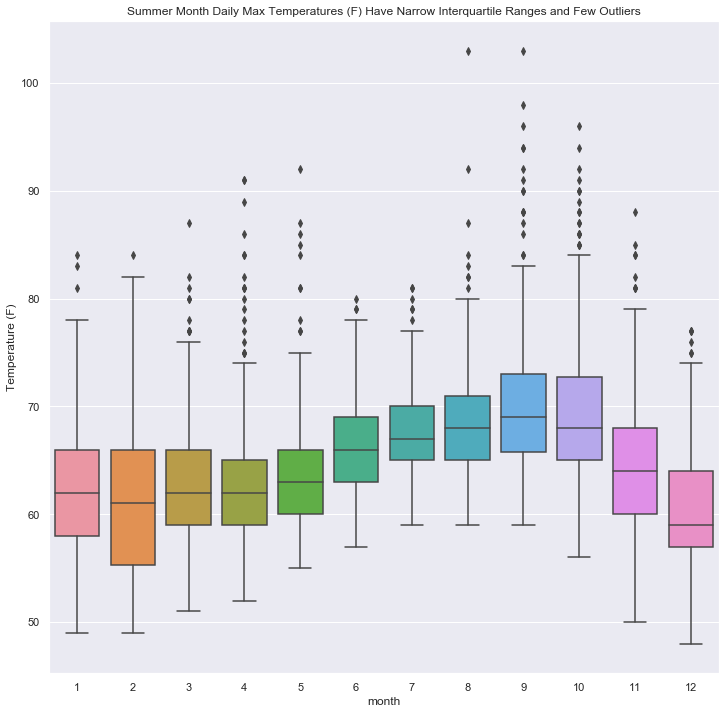

In [238]:
plt.figure(figsize=(12, 12))

# processing setup
x = df
x.reset_index()

# wrangle: year columns, day of year index, daily high temperature values
# mean does nothing here: all entries have same max value
x = x.groupby([x.index.month, x.index.date]).DailyMaximumDryBulbTemperature.last() # all hourly entries have same value
x.index = x.index.rename(['month', 'date'])
x = x.unstack(level=0)
x.head(100)


# # plot
b = sns.boxplot(data=x)
b.set_title('Summer Month Daily Max Temperatures (F) Have Narrow Interquartile Ranges and Few Outliers')
b.set_ylabel('Temperature (F)')
plt.show()

This plot confirms what we see in the previous line plot: the "summer" months have a much narrower range of maximum temperatures than the other months; June and July have the fewest outlier temperatures. February has an exceptionally wide range of temperatures compared to the other months.

*10. Which months have the narrowest range of daily minimum temperatures and the fewest number of outliers across the decade?*

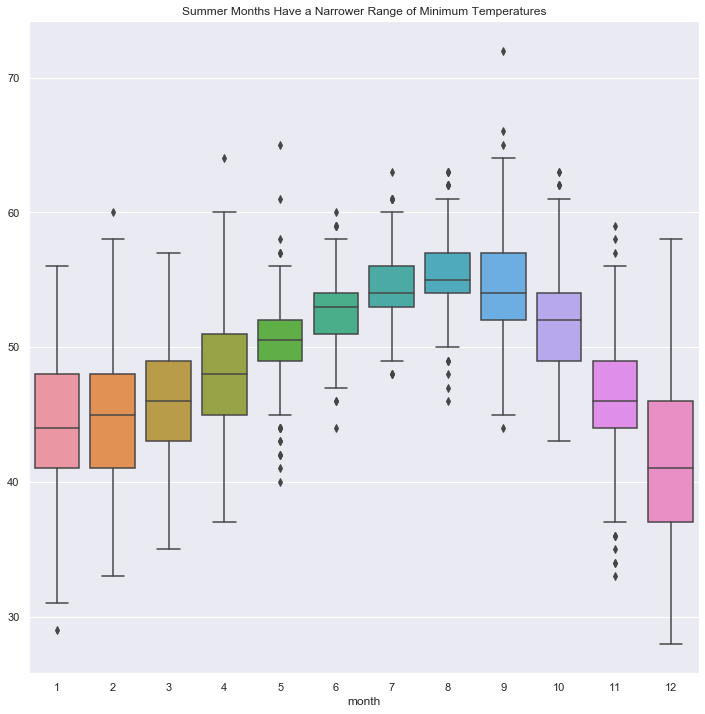

In [239]:
plt.figure(figsize=(12, 12))

# processing setup
x = df
x.reset_index()

# wrangle: year columns, day of year index, daily high temperature values
x = x.groupby([x.index.month, x.index.date]).DailyMinimumDryBulbTemperature.first()
x.index = x.index.rename(['month', 'date'])
x = x.unstack(level=0)
x.head(100)


# # plot
sns.boxplot(data=x).set_title('Summer Months Have a Narrower Range of Minimum Temperatures')
plt.show()

The minimum temperatures per month show a much more pronounced seasonal variation, with the "summer" months showing notably smaller interquartile ranges than the other months.

Now let's have a look at the correlation between maximum daily temperature and daily average sky obscuration:

*11. Does sky obscuration correlate with daily maximum temperature?*

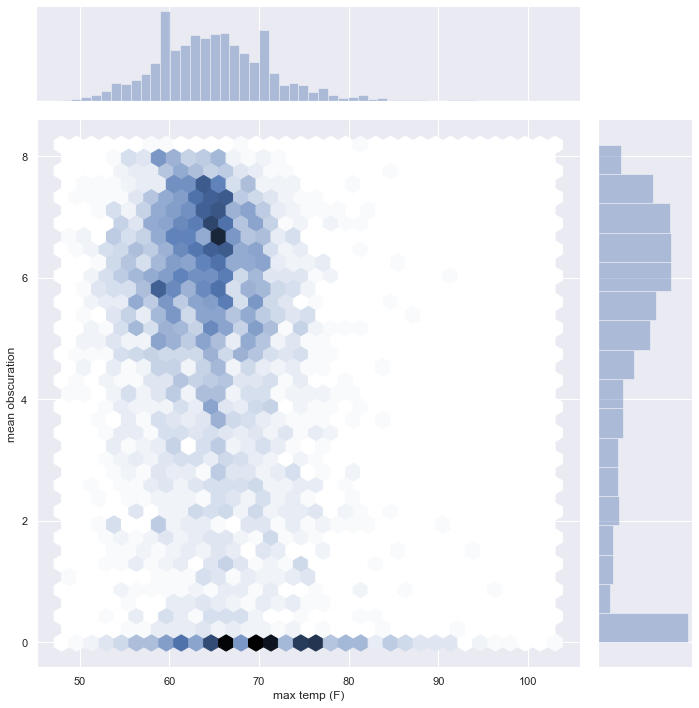

In [240]:
# processing setup
x = df
x.reset_index()
x.head()

# wrangle: create average obscuration and max temperature columns
x = pd.DataFrame(x.groupby([x.index.date, x['DailyMaximumDryBulbTemperature']]).averageObscuration.mean())
x.index = x.index.rename(['date', 'max temp (F)'])
x = x.reset_index()
x = x.set_index(['date'])
x.columns = ['max temp (F)', 'mean obscuration']
x.head()

# plot
hexplot = sns.jointplot(x='max temp (F)', y='mean obscuration', height=10, data=x, kind='hex')
plt.show()

This plot and its accompanying histograms show a strong correlation between a range of temperatures and overcast weather: there are lots of overcast days with a maximum temperature between 60 and 70 degrees. 

*11. How does obscuration correlate with minimum daily temperature?*

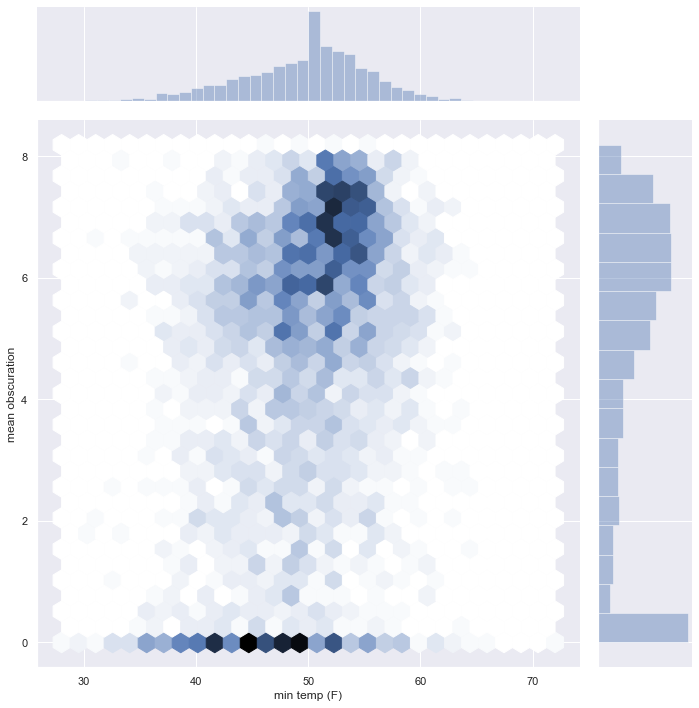

In [241]:
# processing setup
x = df
x.reset_index()
x.head()

# wrangle: create average obscuration and min temperature columns
x = pd.DataFrame(x.groupby([x.index.date, x['DailyMinimumDryBulbTemperature']]).averageObscuration.mean())
x.index = x.index.rename(['date', 'max temp (F)'])
x = x.reset_index()
x = x.set_index(['date'])
x.columns = ['min temp (F)', 'mean obscuration']
x.head()

# plot
hexplot = sns.jointplot(x='min temp (F)', y='mean obscuration', height=10, data=x, kind='hex')
plt.show()

Lastly, we'll have a look at rainfall and wind patterns. 

*12. Is there a correlation between daily peak wind speed and daily precipitation?*

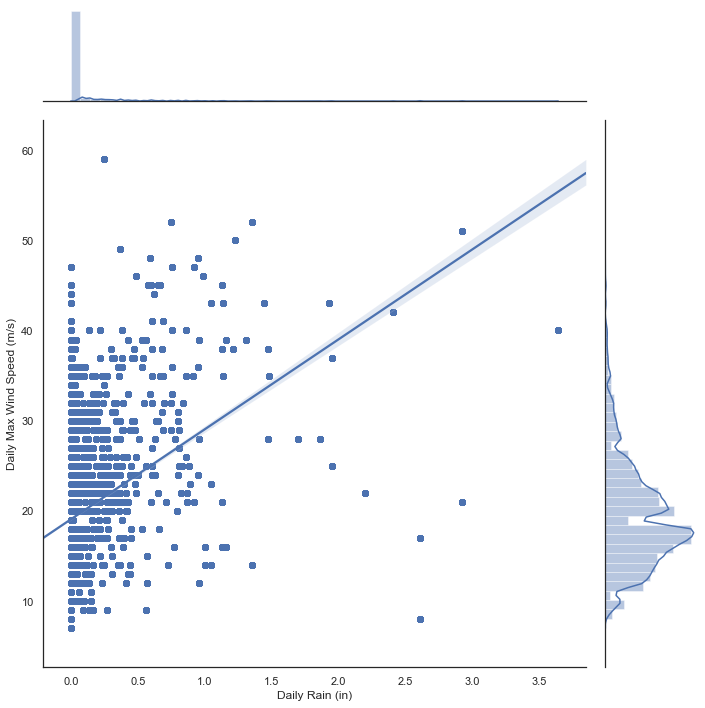

In [242]:
# processing setup
x = df
x.reset_index()
x.head()

# wrangle: rename wind speed and precipitation columns
x = x.rename(columns={'DailyPrecipitation': "Daily Rain (in)", 'DailyPeakWindSpeed': 'Daily Max Wind Speed (m/s)'})

# plot
sns.set_style('white')
j = sns.jointplot(x='Daily Rain (in)', y='Daily Max Wind Speed (m/s)', height=10, data=x, kind='reg')
plt.show()

It looks like higher wind speeds correlate with more daily precipitation, but the confidence interval spreads as the amount of rain increases, because we have many fewer data points. It also looks like most days have between 0 and 1 mm of precipitation, which makes sense, as California experienced a historic drought for a large part of the last decade. But in the past few years, California has also seen historic rains, thanks to increasingly common atmospheric river events.

*13. How many days had no rain in each year of the last decade?*

In [243]:
x = df[(df.index.year >= 2010) & (df.index.year < 2019)] # choose 2010 through 2018, because 2009 and 2019 are missing some dates
x = x.groupby([x.index.year, x.index.date]).DailyPrecipitation.sum()
x.index = x.index.rename(['year', 'date'])
x = x[x == 0]
x = x.reset_index()
x = x.groupby('year').count().rename(columns={'DailyPrecipitation':'Days Without Rain'}).drop(columns=['date'])
x

,Days Without Rain
year,
2010,265
2011,295
2012,303
2013,341
2014,303
2015,324
2016,295
2017,286
2018,312


Several online sources report that the average annual rainfall in Monterey is around 500 mm. How do these data align with that figure? The drought and the atmospheric river events should both pull the average lower and higher respectively — which trend wins out?

*14. What has the average annual of rainfall been for the last decade?*

In [244]:
x = df
x = x.groupby([x.index.year, x.index.date])['DailyPrecipitation'].first()
x.index = x.index.rename(['year', 'date'])
x = x.groupby(['year']).sum().mean()
x

17.19363636363636

17.2 inches is about 436 mm, which brings in the average a bit below a widely reported average figure.

*15. What's the annual rainfall for each year between 2010 and 2018  inclusive?*

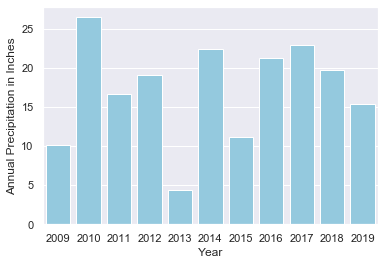

In [245]:
x = df
x = x.groupby([x.index.year, x.index.date])['DailyPrecipitation'].first()
x.index = x.index.rename(['Year', 'Date'])
x = pd.DataFrame(x.groupby(['Year']).sum())
x.columns = ['Annual Precipitation in Inches']
x = x.reset_index()

# plot
sns.set_style('darkgrid')
sns.barplot(x='Year', y='Annual Precipitation in Inches', color='skyblue', data=x)
plt.show()

There's been a wide range of annual rainfalls in the last decade, from 4.33 inches in 2013 to 22.85 inches in 2017.

*16. What is the daily precipitation for the 36 clearish calendar days?*

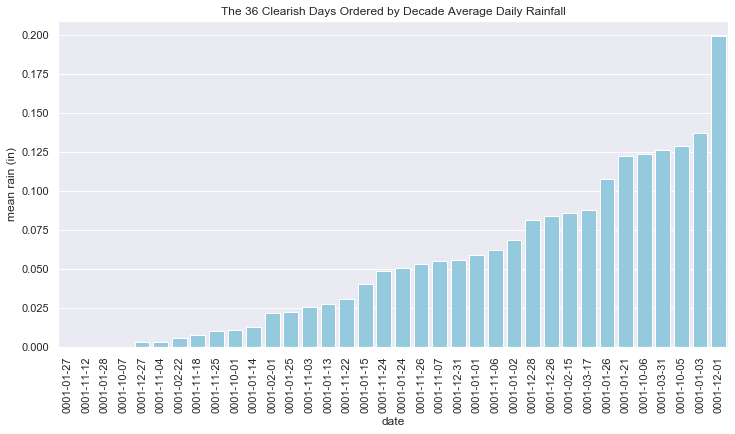

In [246]:
plt.figure(figsize=(12, 6))

by_date = df[(df.index.hour >= 10) & (df.index.hour <= 16)] # get 10 AM to 4 PM (see definition of 'clearish' above)

# mean the average daily obscuration and keep the first value for daily precipitaton for each date throughout decade
by_date = df.groupby([df.index.date]).agg({'DailyPrecipitation': 'first', 'averageObscuration': 'mean'})

# further average both obscuration and daily rainfall by calendar day
by_date = df.groupby([df.index.month, df.index.day]).agg({'DailyPrecipitation': 'mean', 'averageObscuration': 'mean'})
by_date.index = by_date.index.rename(['month', 'day'])
by_date.columns = ['mean rain (in)', 'mean obscuration']
by_date = by_date.reset_index()

# filter out clearish days
by_date = by_date[by_date['mean obscuration'] <= 3.5] # 3.5 is a conservative cut-off for a clear day: there are at worst "scattered clouds"

# sort by ascending rainfall
by_date = by_date.sort_values(by='mean rain (in)')

# add a date column to serve as the index
by_date['date'] = by_date.apply(lambda x: date(year=1, month=int(x['month']), day=int(x['day'])), axis=1)
by_date


# plot
b = sns.barplot(x='date', y='mean rain (in)', color='skyblue', data=by_date)
b.set_title('The 36 Clearish Days Ordered by Decade Average Daily Rainfall')
plt.xticks(rotation=90) 
plt.show()

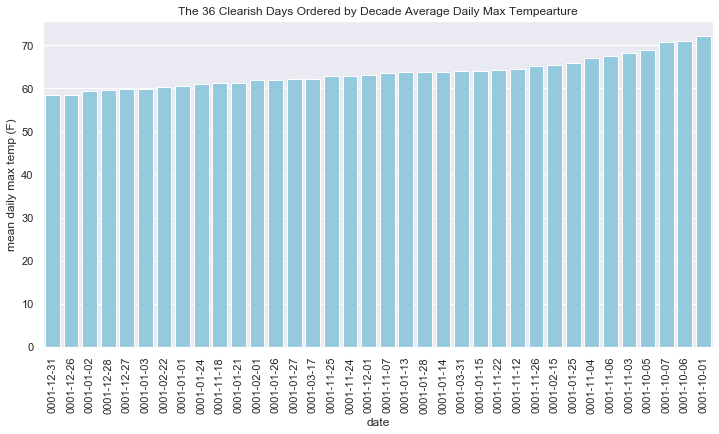

In [247]:
plt.figure(figsize=(12, 6))

by_date = df[(df.index.hour >= 10) & (df.index.hour <= 16)] # get 10 AM to 4 PM (see definition of 'clearish' above)

# mean the average daily obscuration and keep the first value for daily precipitaton for each date throughout decade
by_date = df.groupby([df.index.date]).agg({'DailyMaximumDryBulbTemperature': 'first', 'averageObscuration': 'mean'})

# further average both obscuration and daily rainfall by calendar day
by_date = df.groupby([df.index.month, df.index.day]).agg({'DailyMaximumDryBulbTemperature': 'mean', 'averageObscuration': 'mean'})
by_date.index = by_date.index.rename(['month', 'day'])
by_date.columns = ['mean daily max temp (F)', 'mean obscuration']
by_date = by_date.reset_index()

# filter out clearish days
by_date = by_date[by_date['mean obscuration'] <= 3.5] # 3.5 is a conservative cut-off for a clear day: there are at worst "scattered clouds"

# sort by ascending rainfall
by_date = by_date.sort_values(by='mean daily max temp (F)')

# add a date column to serve as the index
by_date['date'] = by_date.apply(lambda x: date(year=1, month=int(x['month']), day=int(x['day'])), axis=1)
by_date


# plot
b = sns.barplot(x='date', y='mean daily max temp (F)', color='skyblue', data=by_date)
b.set_title('The 36 Clearish Days Ordered by Decade Average Daily Max Tempearture')
plt.xticks(rotation=90) 
plt.show()

Does average daily sky obscuration act seasonally throughout the year?

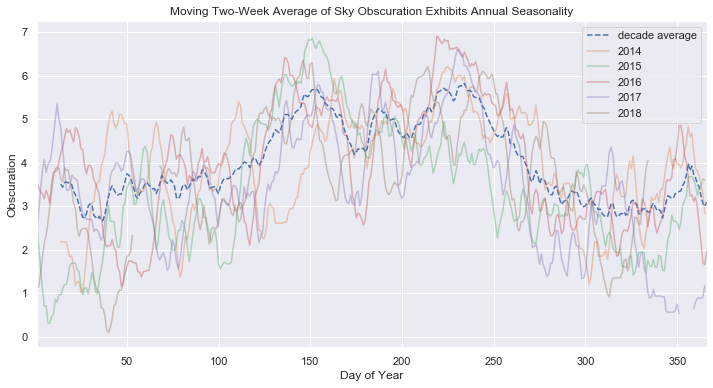

In [248]:
plt.figure(figsize=(12, 6))

x = df
bool_index = (x.index.year >= 2014) & (x.index.year <= 2018) # only these years have data for all days of the year
x = x[bool_index]

mean_obsc = x.groupby([x.index.year, x.index.dayofyear])['averageObscuration'].mean().rolling(14).mean()

mean_obsc_decade = x.groupby([x.index.dayofyear])['averageObscuration'].mean().rolling(14).mean().plot(label='decade average', linestyle='--')

mean_obsc = mean_obsc.unstack(level=0)

# plot
for col in mean_obsc.columns:
    plt.plot(mean_obsc[col], label=str(col), alpha=.4)
plt.legend()
plt.title('Moving Two-Week Average of Sky Obscuration Exhibits Annual Seasonality')
plt.xlabel('Day of Year')
plt.ylabel('Obscuration')
plt.show()


Sky obscuration seems to roughly follow annual fluctuations in temperature. Let's plot both to see their annual fluctuation:

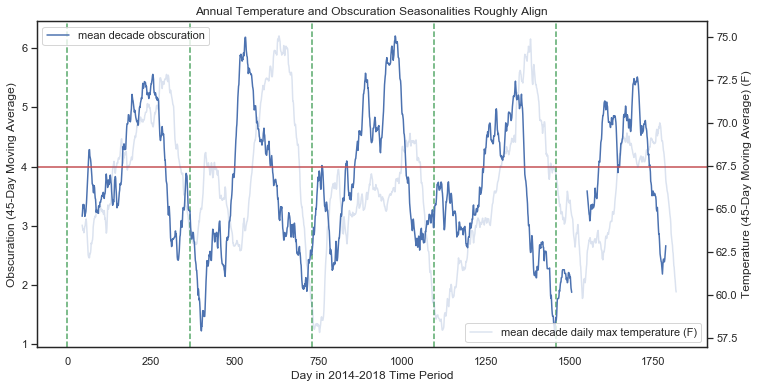

In [255]:
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.set_style('white')

x = df
bool_index = (x.index.year >= 2014) & (x.index.year <= 2018) # only these years have data for all days of the year
x = x[bool_index]
x = x[['averageObscuration', 'DailyMaximumDryBulbTemperature']]

days = x.groupby([x.index.year, x.index.dayofyear]).mean().rolling(45).mean()
days.index = days.index.rename(['year', 'day'])
days = days.reset_index()
days = days.drop(['year', 'day'], axis=1)

# plot
[ax1.axvline(x, color='g', linestyle='--') for x in [y*365 for y in range(5)]] # show year starts

ax1.plot(days['averageObscuration'], label='mean decade obscuration')
ax1.set_xlabel('Day in 2014-2018 Time Period')
ax1.set_ylabel('Obscuration (45-Day Moving Average)')
ax1.legend(loc='upper left')
ax1.axhline(4, color='r')
ax2 = ax1.twinx() # share x axis, use two separate y axes on left and right sides
ax2.plot(days['DailyMaximumDryBulbTemperature'], label='mean decade daily max temperature (F)', alpha=0.2)
ax2.legend(loc='lower right')
ax2.set_ylabel('Temperature (45-Day Moving Average) (F)')
plt.title('Annual Temperature and Obscuration Seasonalities Roughly Align')
plt.show()

While both obscuration and maximum temperature show annually seasonal behavior, their cycles align unpredictably from year to year.

The heat index measures "real feel" temperature as a function of dry bulb temperature and relative percent humidity. Are there substantial humidity fluctuations that should be taken into account with these data?

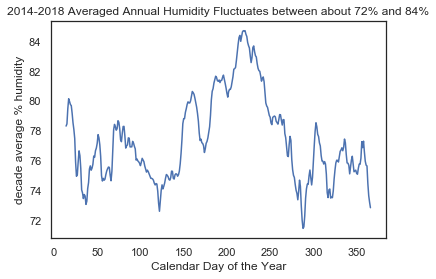

In [264]:
x = df
bool_index = (x.index.year >= 2014) & (x.index.year <= 2018) # only these years have data for all days of the year
x = x[bool_index]
x = x.groupby(x.index.dayofyear).mean()['HourlyRelativeHumidity'].rolling(14).mean()

plt.plot(x, label='hourly humidity (2-week rolling average)')
plt.xlabel('Calendar Day of the Year')
plt.ylabel('decade average % humidity')
plt.title('2014-2018 Averaged Annual Humidity Fluctuates between about 72% and 84%')
plt.show()

Given the range of maximum temperatures in the data, this range of humidities (72%-84%) means a heat index felt-temperature fluctuation of one degree or less. It should be suffiicient to equate dry bulb temperature with the felt air temperature.